<a href="https://colab.research.google.com/github/SACHINMATHEW4/ML-projects/blob/main/Song_Hit_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

In [ ]:
import chardet

with open('/content/SongDataset.csv', 'rb') as file:
    result = chardet.detect(file.read())

df = pd.read_csv('/content/SongDataset.csv', encoding=result['encoding'])

In [ ]:
# Separate features and labels
X = df.drop(columns=['Popularity', 'Song Name', 'Artist', 'Genre'])  # Exclude non-numeric columns
y = df['Popularity']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Create a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer for regression
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
6/6 [==============================] - 2s 102ms/step - loss: 1287.5831 - val_loss: 1214.1720
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 1272.8894 - val_loss: 1203.9709
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 1259.7629 - val_loss: 1193.6204
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 1246.2230 - val_loss: 1183.1244
Epoch 5/50
6/6 [==============================] - 0s 14ms/step - loss: 1232.1143 - val_loss: 1171.0970
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1215.7693 - val_loss: 1157.7864
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 1198.7191 - val_loss: 1142.2773
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 1177.5157 - val_loss: 1124.6561
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 1154.8217 - val_loss: 1104.3357
Epoch 10/50
6/6 [==============================] - 0s 11ms/step - loss: 

In [ ]:
# Evaluate the model on the test data
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

2/2 [==============================] - 0s 7ms/step - loss: 636.6113
Test Loss: 636.6112670898438


In [ ]:
# Load new data from a CSV file for prediction
new_data = pd.read_csv('/content/testcase(1).csv')

In [ ]:
# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)


In [ ]:
# Make predictions on new data
predictions = model.predict(new_data_scaled)

1/1 [==============================] - 0s 85ms/step


In [ ]:
# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted Popularity'])


In [ ]:
# Combine the new data with the predictions
new_data_with_predictions = pd.concat([new_data, predictions_df], axis=1)


In [ ]:

# Save the new data with predictions to a CSV file
new_data_with_predictions.to_csv('predicted_popularity.csv', index=False)

In [ ]:
print("Song hit predictions saved to 'predicted_popularity.csv'.")

Song hit predictions saved to 'predicted_popularity.csv'.


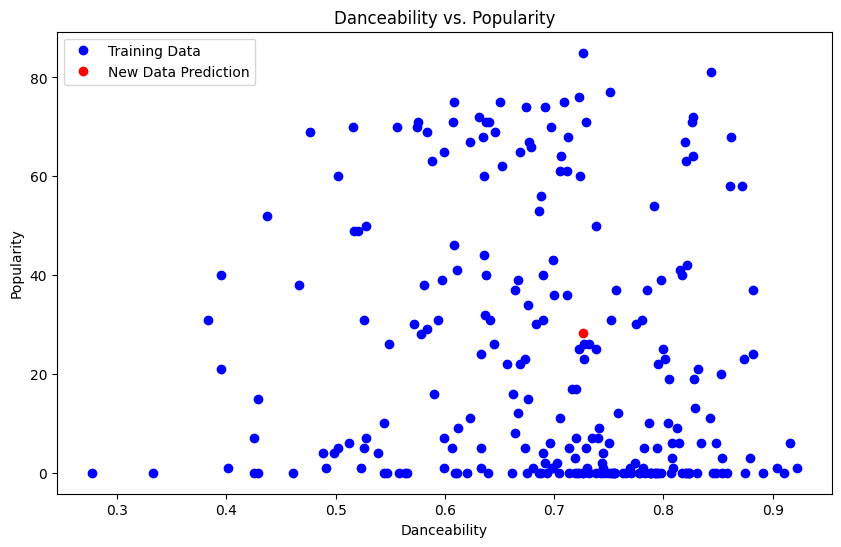

In [ ]:
# Plot danceability comparison graph
plt.figure(figsize=(10, 6))
plt.plot(df['Danceability'], df['Popularity'], 'bo', label='Training Data')
plt.plot(new_data['Danceability'], predictions_df['Predicted Popularity'], 'ro', label='New Data Prediction')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.legend()
plt.title('Danceability vs. Popularity')
plt.show()

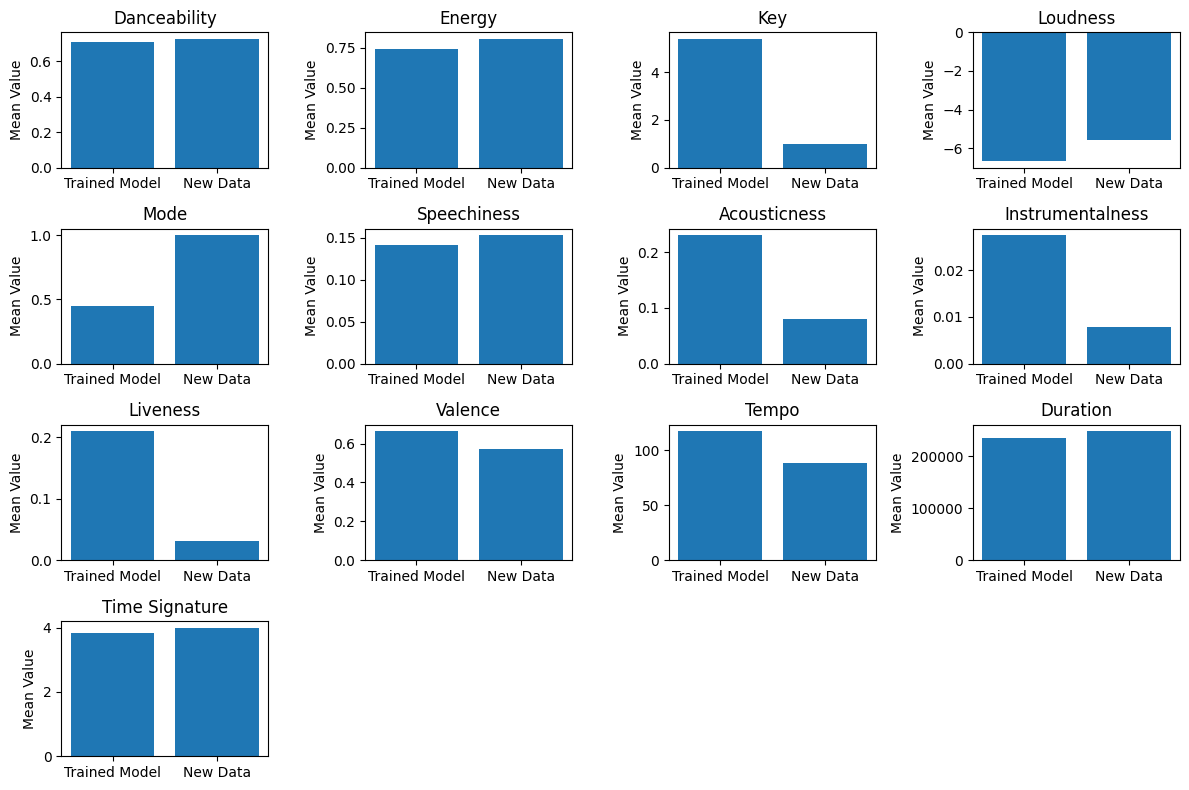

In [ ]:
# Check if the features in X_test and new_data are in the same order
if not X.columns.equals(new_data.columns):
    raise ValueError("Columns in X and new_data do not match. Make sure the columns are in the same order.")

# Check if the number of features in X_test and new_data are the same
if X.shape[1] != new_data.shape[1]:
    raise ValueError("Number of features in X and new_data do not match. Make sure they have the same number of features.")

# Plot bar graphs for each feature
plt.figure(figsize=(12, 8))
features = X.columns

# Plot bar graphs for each feature
num_features = len(features)
num_rows = (num_features + 3) // 4  # Round up to the nearest integer

for i, feature in enumerate(features):
     plt.subplot(num_rows, 4, i + 1)
     plt.bar(['Trained Model', 'New Data'], [X_test[feature].mean(), new_data[feature].mean()])
     plt.title(feature)
     plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()